# Q2.a

In [1]:

import numpy as np
import torch.nn as nn
import torch
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm
from skimage.transform import rotate
from skimage.util import random_noise
import torchvision.transforms.functional as TF
import random
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
# load data
transform = transforms.Compose(
    [transforms.ToTensor()])
     #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,shuffle=False, num_workers=2)

classes = ('airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')




Files already downloaded and verified
Files already downloaded and verified


In [3]:
from torch.nn.modules.activation import Softmax
import torch
from torch.nn.modules.pooling import AdaptiveAvgPool2d

# class torch.nn.Conv2d(in_channels,out_channels, kernel_size, stride=1, padding=‘same’, dilation=1, groups=1, bias=True)
model = nn.Sequential(
          nn.Conv2d(3,16,3,1,padding='same'),
          nn.ReLU(),
          nn.Conv2d(16,16,(3,3),(1,1),padding='same'),
          nn.ReLU(),
          nn.MaxPool2d(2,2),
          

          nn.Conv2d(16,32,(3,3),(1,1),padding='same'),
          nn.ReLU(),
          nn.Conv2d(32,32,(3,3),(1,1),padding='same'),
          nn.ReLU(),
          nn.MaxPool2d(2,2),

          nn.Conv2d(32,64,(3,3),(1,1),padding='same'),
          nn.ReLU(),
          nn.Conv2d(64,64,(3,3),(1,1),padding='same'),
          nn.ReLU(),
          nn.MaxPool2d(2,2),

          nn.Conv2d(64,128,(3,3),(1,1),padding='same'),
          nn.ReLU(),
          nn.Conv2d(128,128,(3,3),(1,1),padding='same'),
          nn.ReLU(),

          nn.AdaptiveAvgPool2d((1,1)),
          nn.Flatten(),

          nn.Linear(128,10),

        )

model.to(device)

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (1): ReLU()
  (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (3): ReLU()
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (6): ReLU()
  (7): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (8): ReLU()
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (11): ReLU()
  (12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (13): ReLU()
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (16): ReLU()
  (17): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (18): ReLU()
  (19): AdaptiveAvgPool2d(output_size=(1, 1))
  (20

In [4]:
from torchsummary import summary

summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
              ReLU-2           [-1, 16, 32, 32]               0
            Conv2d-3           [-1, 16, 32, 32]           2,320
              ReLU-4           [-1, 16, 32, 32]               0
         MaxPool2d-5           [-1, 16, 16, 16]               0
            Conv2d-6           [-1, 32, 16, 16]           4,640
              ReLU-7           [-1, 32, 16, 16]               0
            Conv2d-8           [-1, 32, 16, 16]           9,248
              ReLU-9           [-1, 32, 16, 16]               0
        MaxPool2d-10             [-1, 32, 8, 8]               0
           Conv2d-11             [-1, 64, 8, 8]          18,496
             ReLU-12             [-1, 64, 8, 8]               0
           Conv2d-13             [-1, 64, 8, 8]          36,928
             ReLU-14             [-1, 6

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001,momentum=0.9)

# Q2.2 pic of each layer

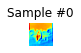

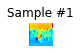

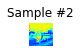

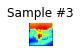

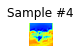

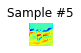

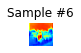

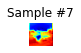

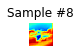

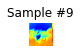

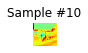

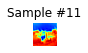

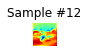

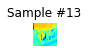

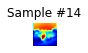

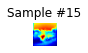

In [7]:
from torchvision.models.feature_extraction import create_feature_extractor, get_graph_node_names

images, labels = iter(trainloader).next()
image_example = torchvision.utils.make_grid(images[0])
image_example = image_example.unsqueeze(0)  # if torch tensor

exact_list = {'0': '0', 
        '1': '1',
        '2': '2',
        '3': '3',
        '4': '4',
        '5': '5',
        '6': '6',
        '7': '7',
        '8': '8',
        '9': '9',
        '10': '10',
        '11': '11',
        '12': '12',
        '13': '13',
        '14': '14',
        '15': '15',
        '16': '16',
        '17': '17',
        '18': '18',
        '19': '19',
        '20': '20',
        '21': '21'}

device="cpu"
model = model.to(device)

# exact_list = sorted(exact_list.items(), key=lambda x: x[1])
# exact_list = {key: str(value) for key, value in exact_list}
# exact_list

feature_extractor = create_feature_extractor(model,exact_list)
x = feature_extractor(image_example)
# print(len(x.layer))
# print(x)
# print('')
for i in range(16):
    ax = plt.subplot(8, 8, i + 1)
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    plt.imshow(x['0'].detach().data.numpy()[0,i,:,:],cmap='jet')
    plt.show()

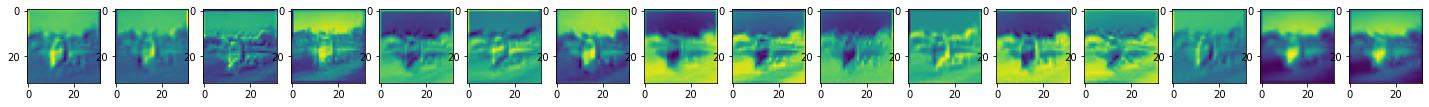

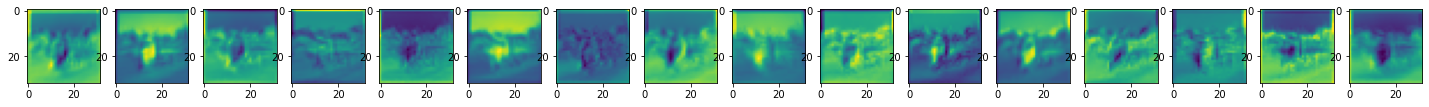

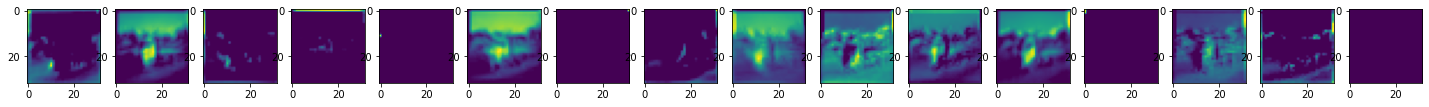

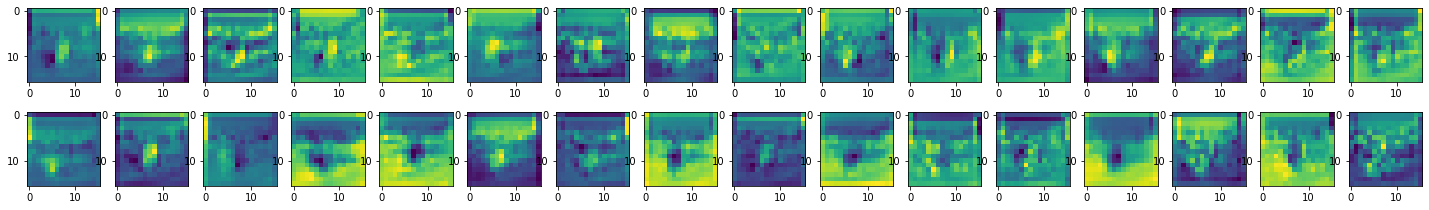

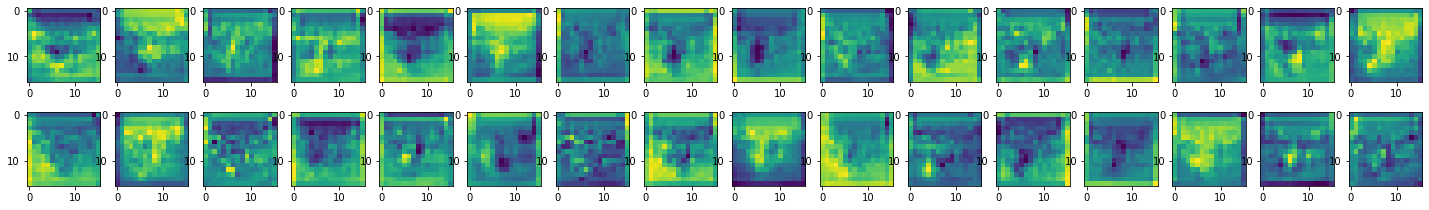

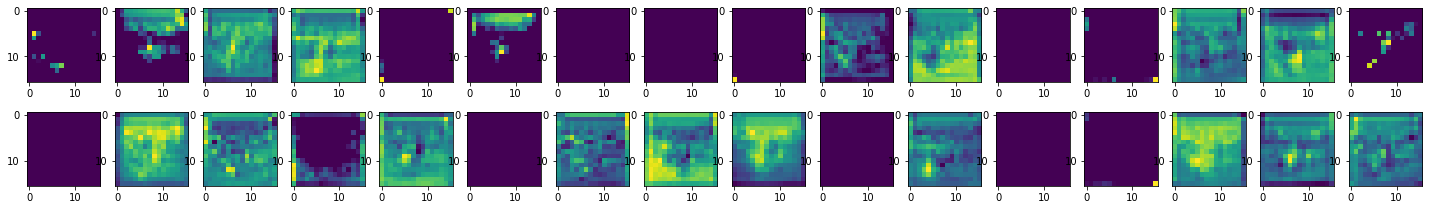

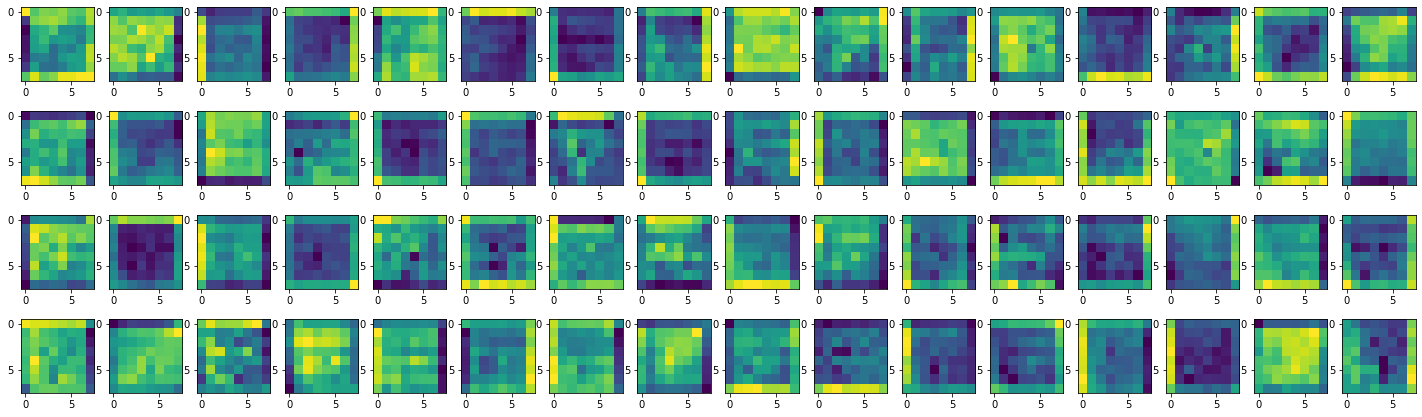

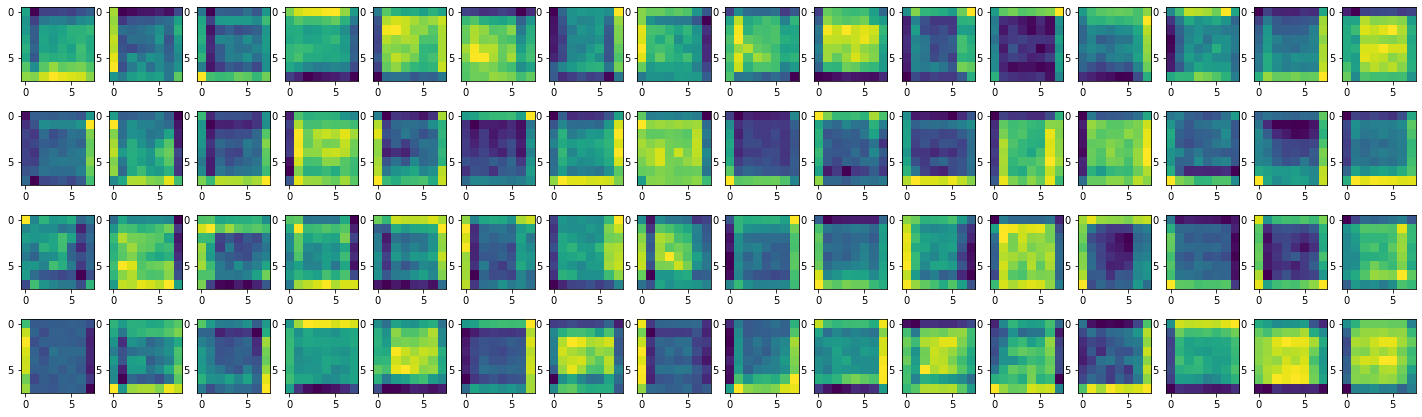

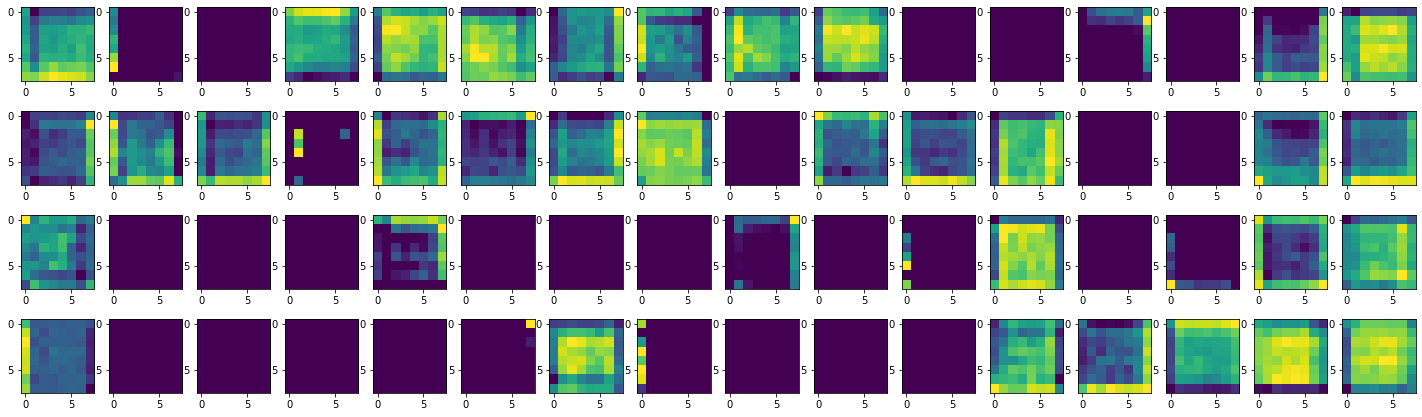

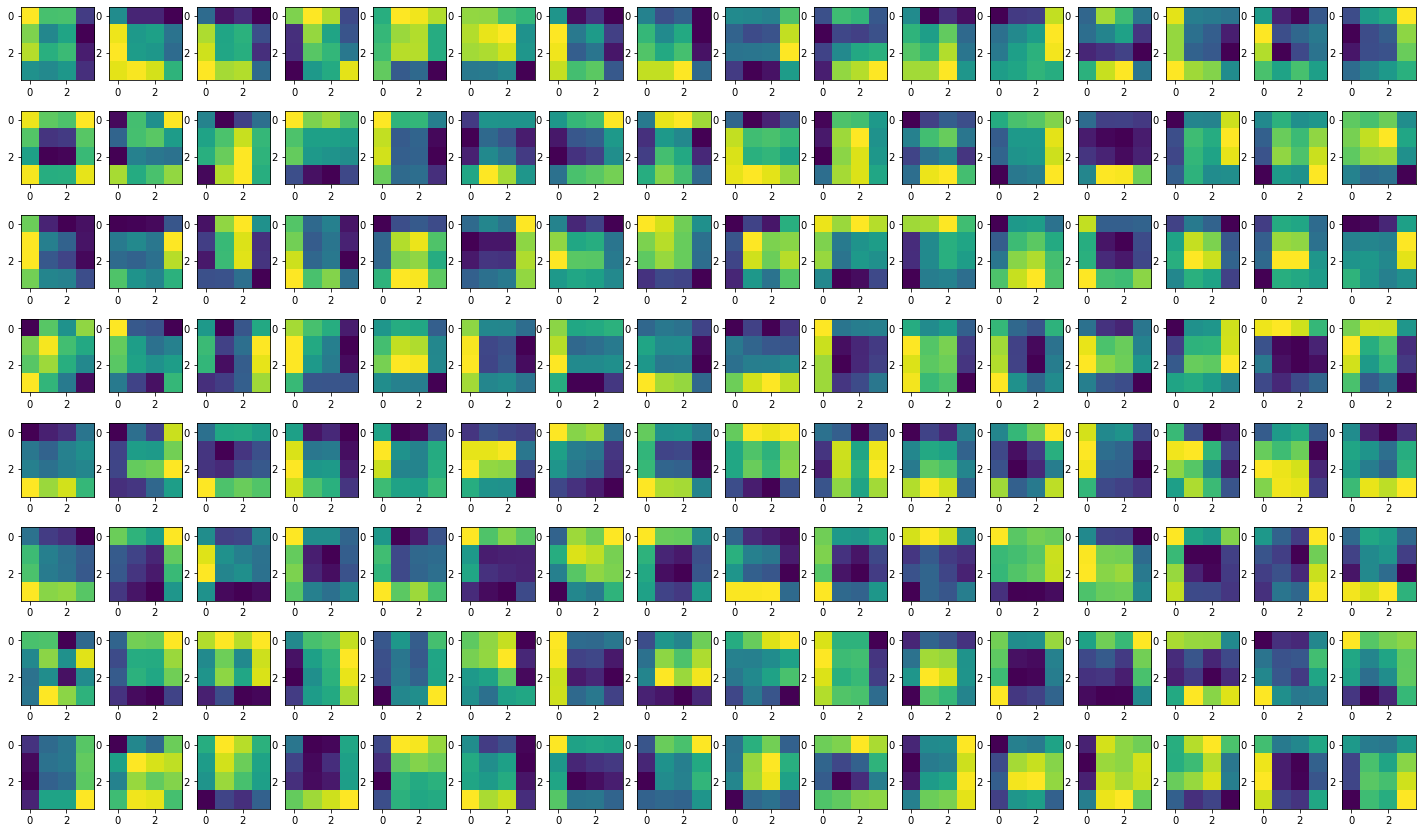

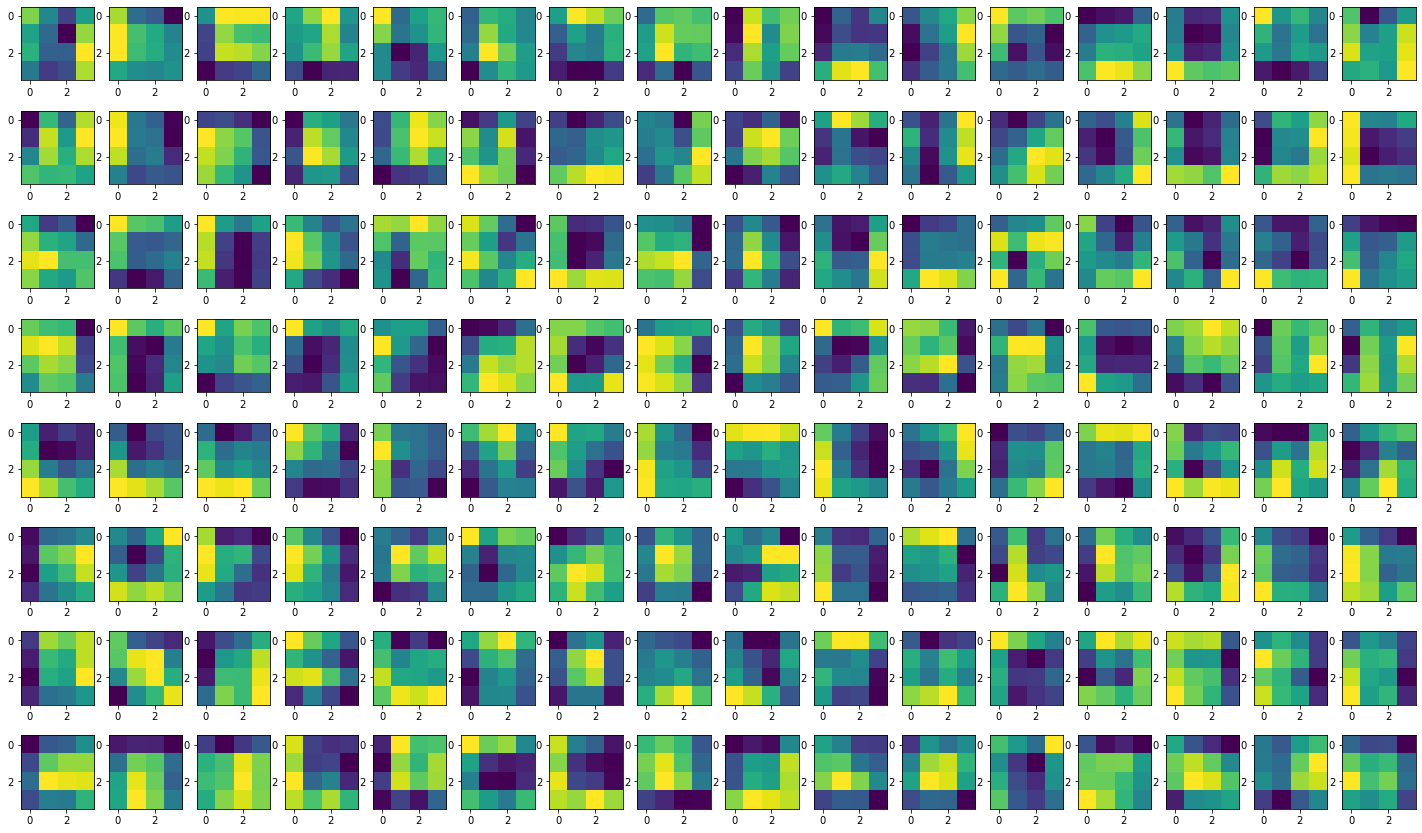

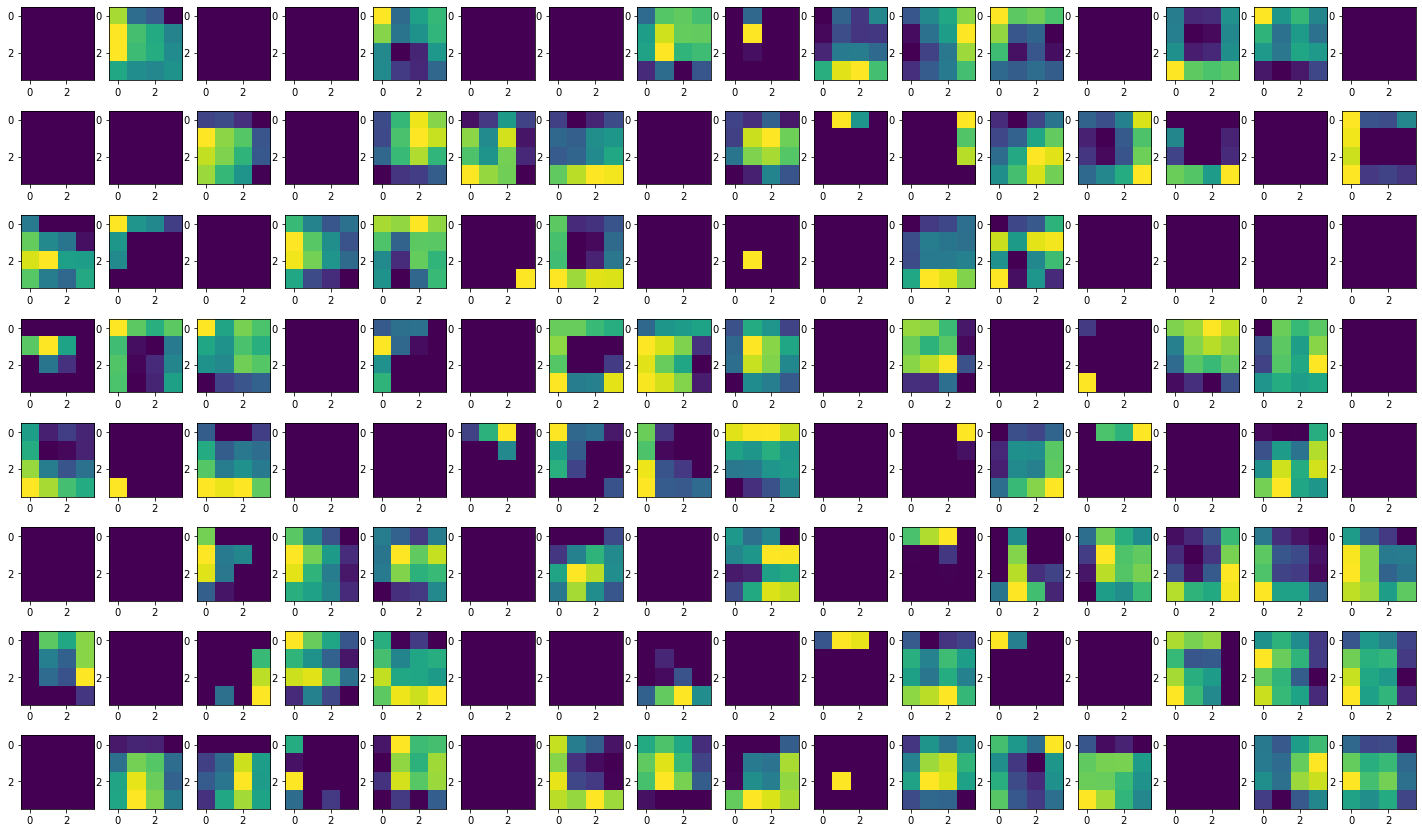

In [8]:
useful_layers = [0,2,3,5,7,8,10,12,13,15,17,18]
useful_layers = [str(x) for x in useful_layers]


for k in useful_layers:
  layer1=x[k].detach().numpy()
  plt.figure(figsize=(25,15))
  # print(layer_name[0])
  for i,item in enumerate(layer1[0]):
    plt.subplot(8, 16, i + 1)
    plt.imshow(layer1[0,i,:,:])
  
  # plt.title(k*20)

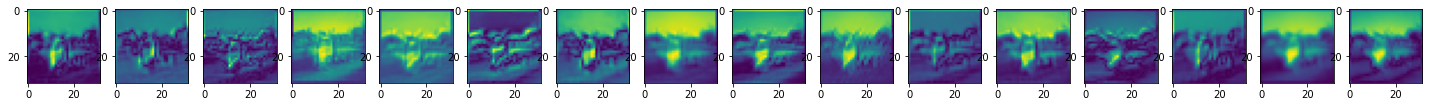

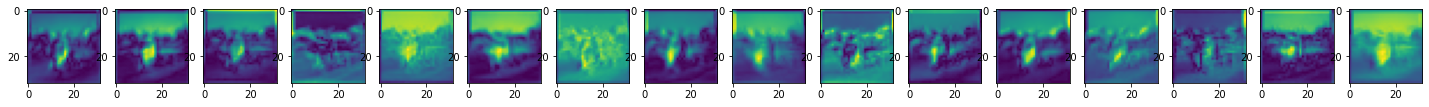

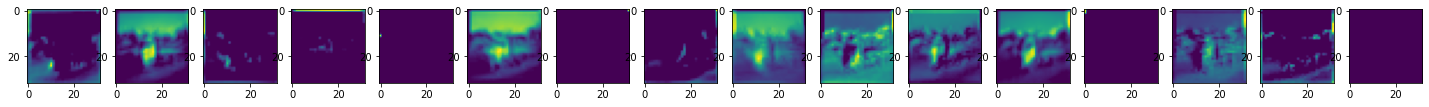

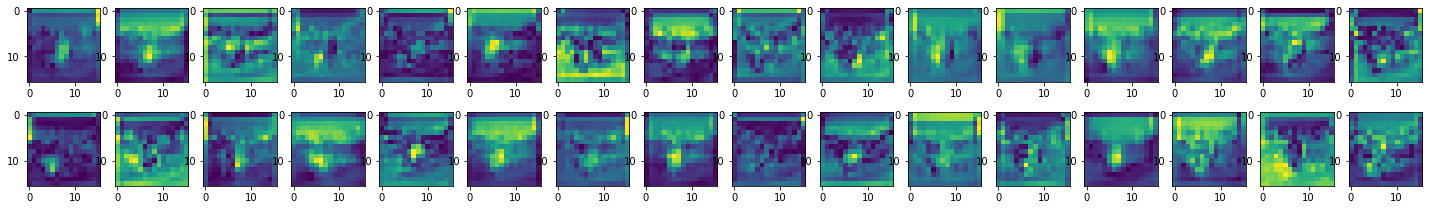

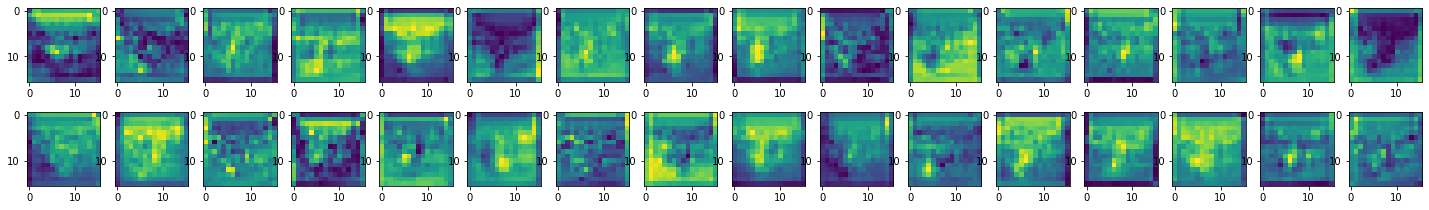

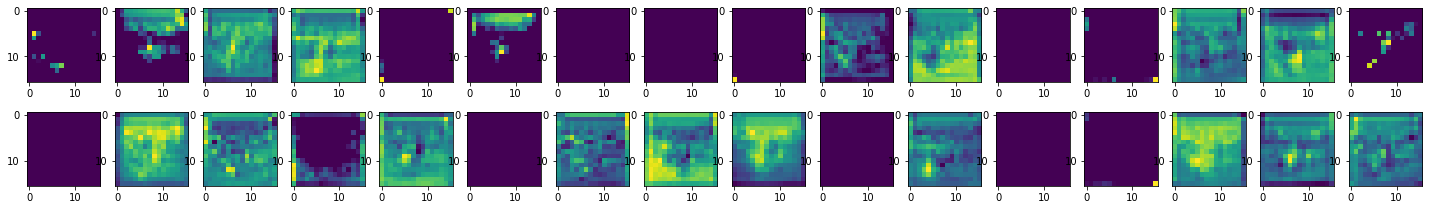

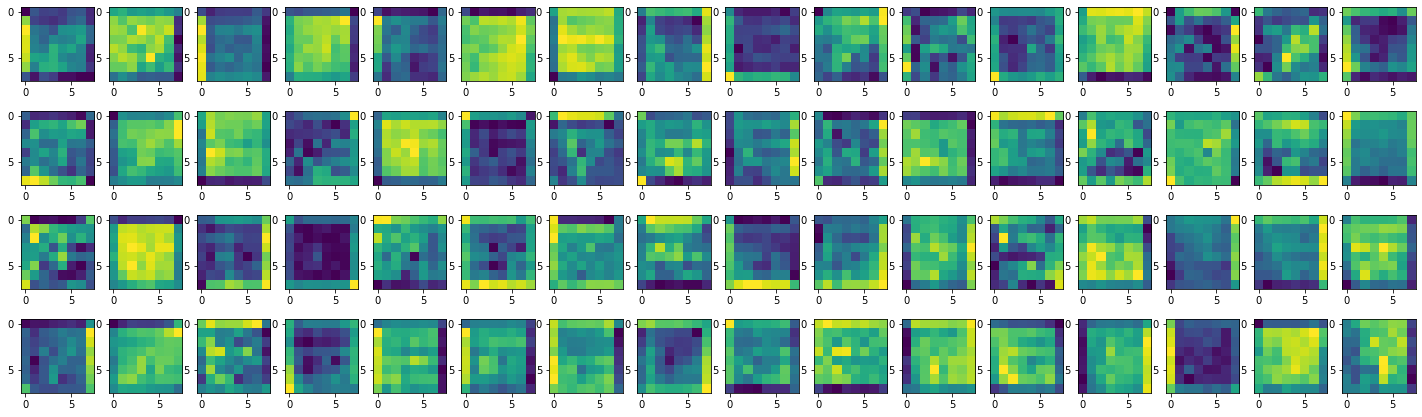

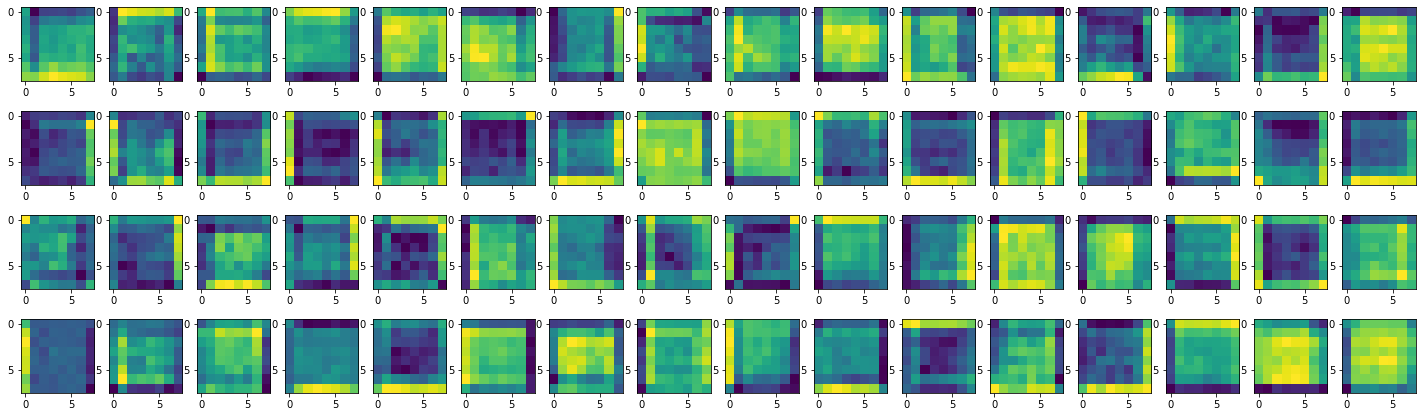

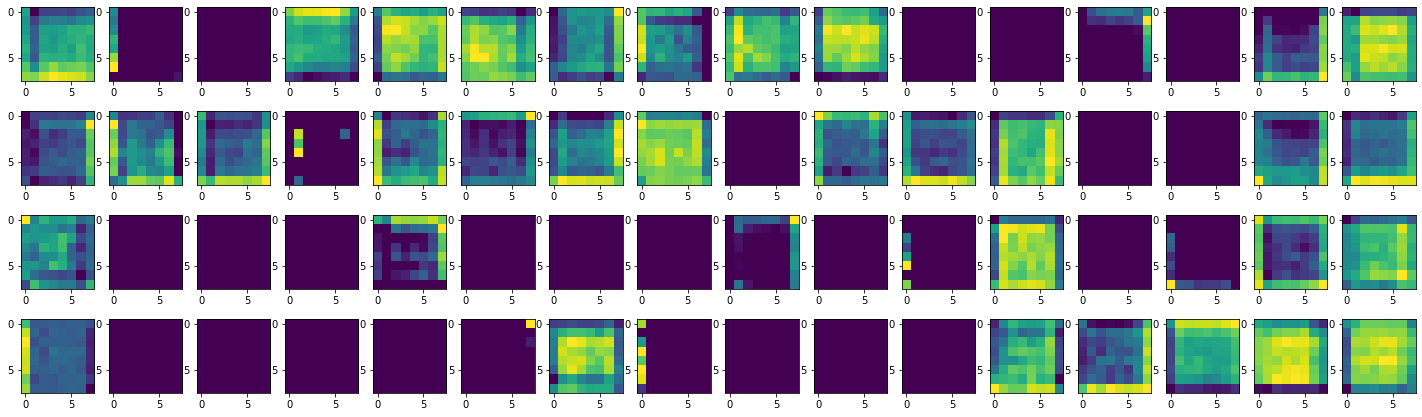

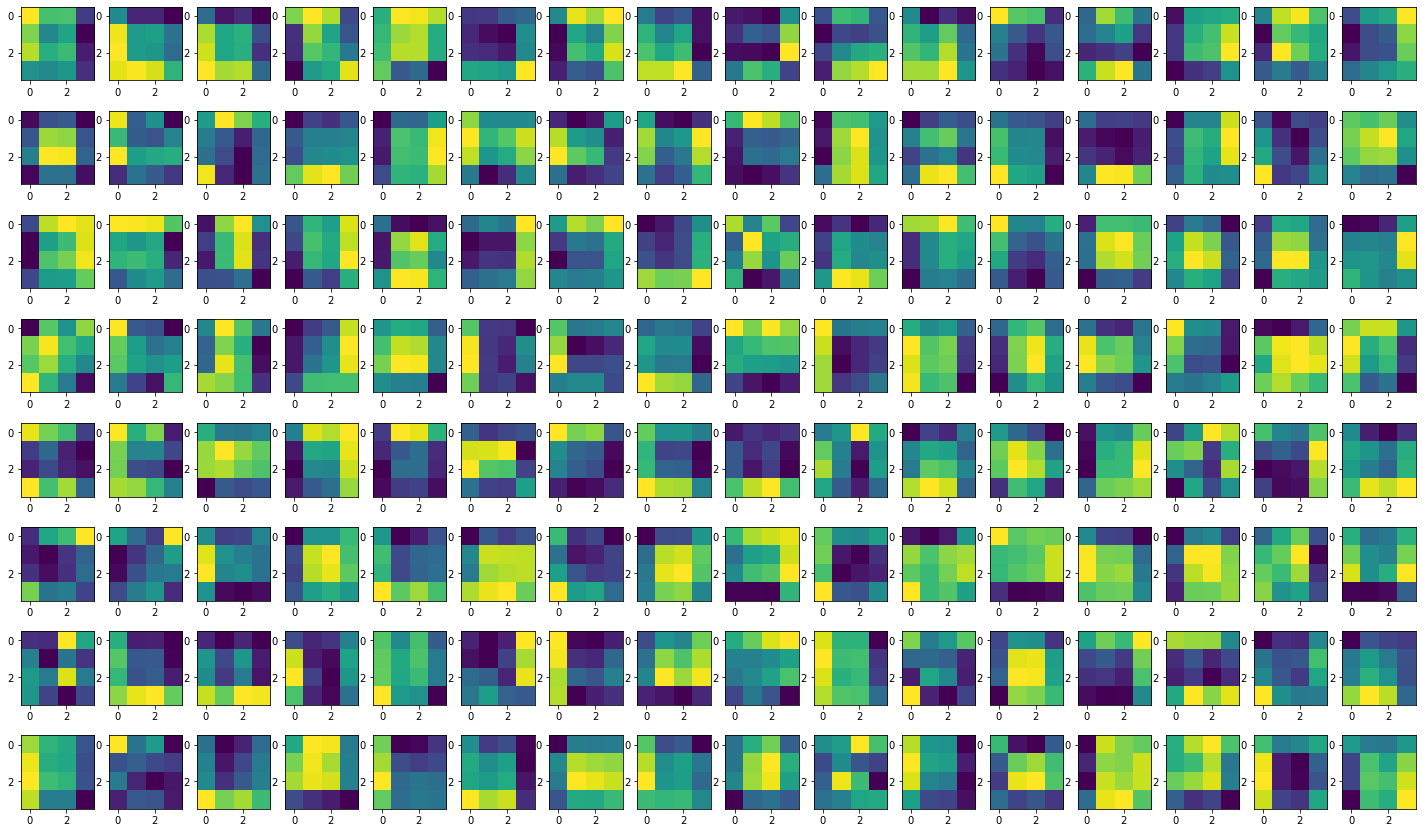

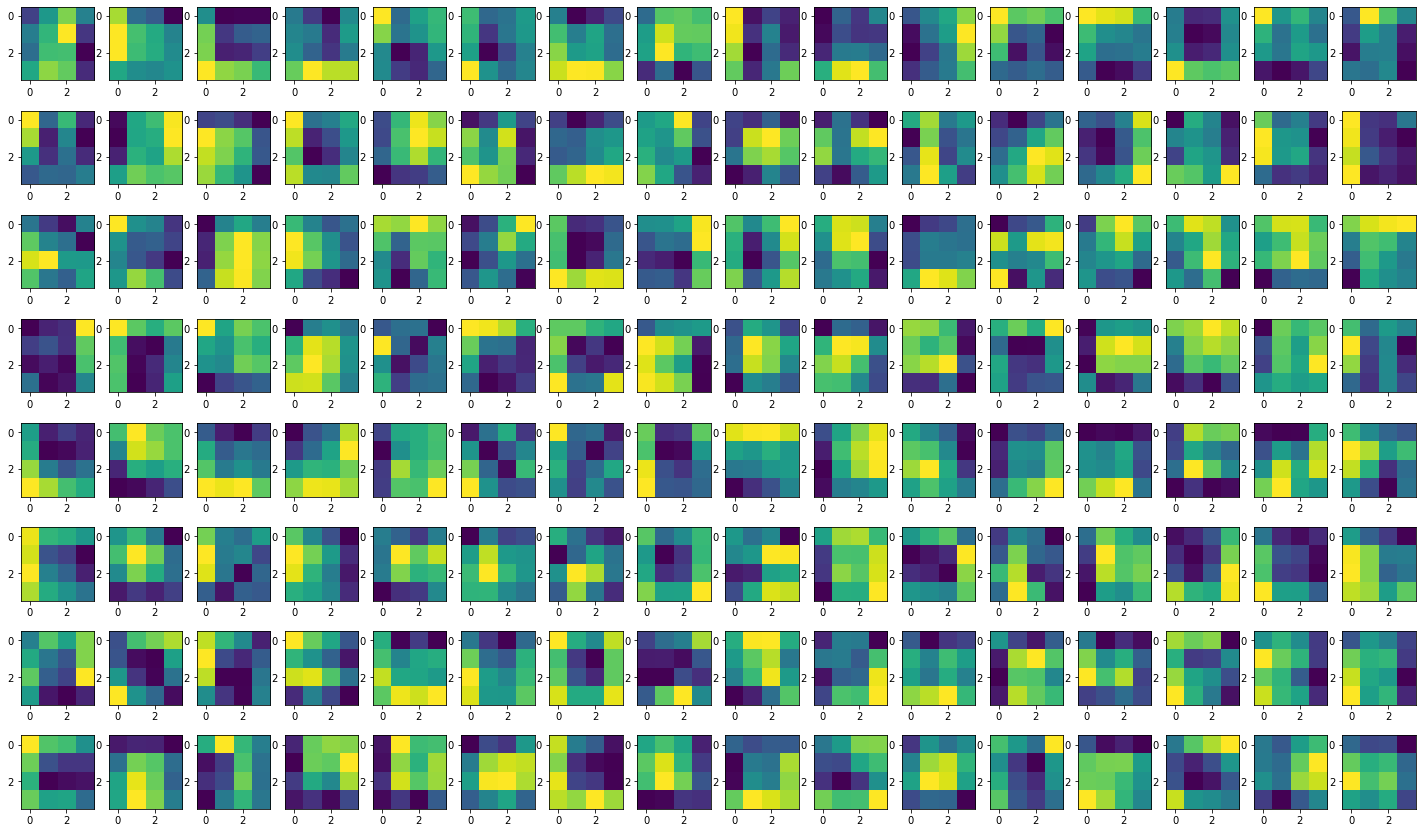

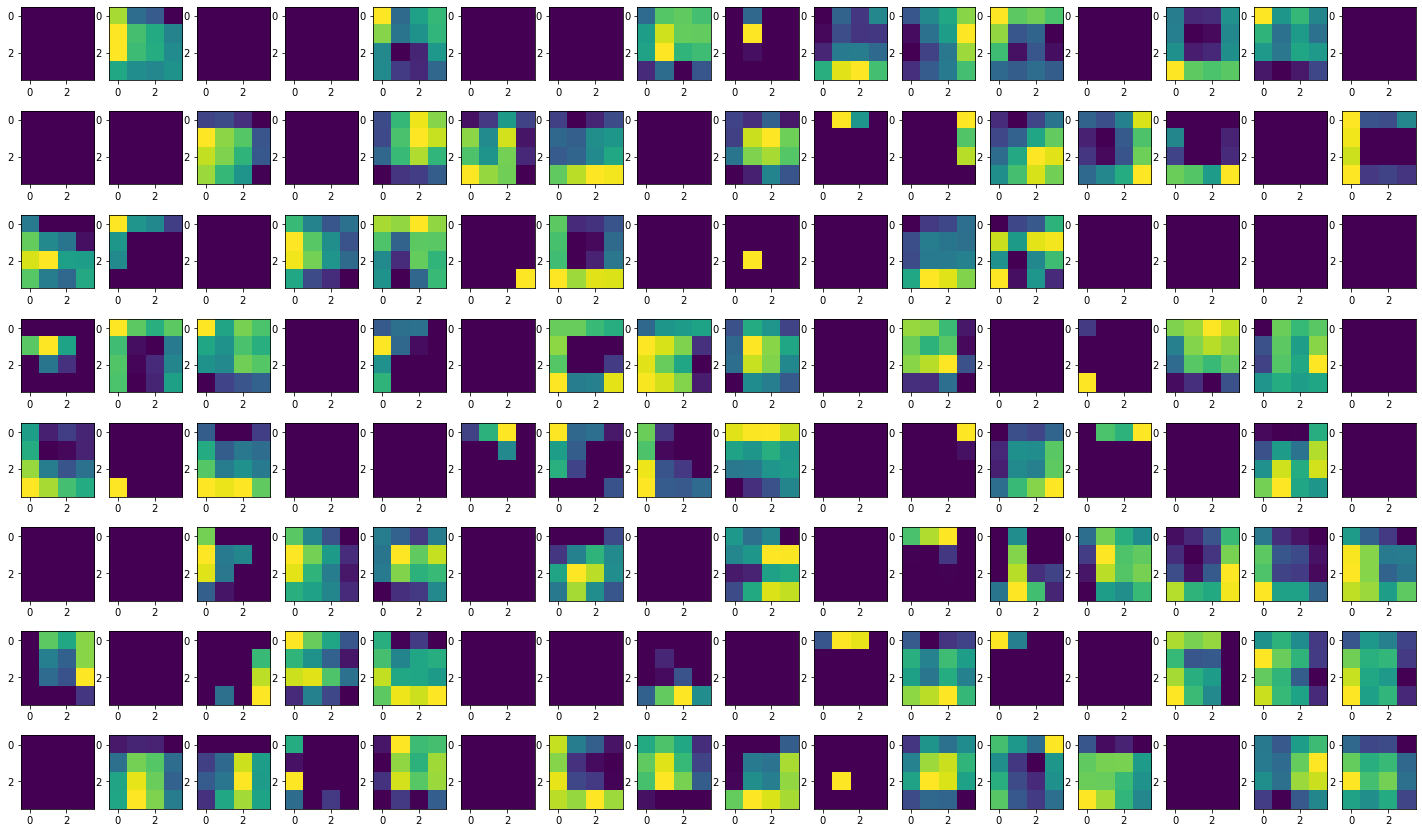

In [9]:
useful_layers = [0,2,3,5,7,8,10,12,13,15,17,18]
useful_layers = [str(x) for x in useful_layers]


for k in useful_layers:
  layer1=x[k].detach().numpy()
  layer_mean = np.expand_dims(np.abs(np.mean(layer1, axis = 0)), axis = 0)
  
  plt.figure(figsize=(25,15))
  # print(layer_name[0])
  for i,item in enumerate(layer_mean[0]):
    plt.subplot(8, 16, i + 1)
    plt.imshow(layer_mean[0,i,:,:])
  
  # plt.title(k*20)

# Q2.b

In [10]:
# load data
transform = transforms.Compose(
    [transforms.ToTensor(),
     #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

batch_size = 500

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,shuffle=False, num_workers=2)

classes = ('airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


In [11]:
from torch.nn.modules.activation import Softmax
import torch
from torch.nn.modules.pooling import AdaptiveAvgPool2d

# class torch.nn.Conv2d(in_channels,out_channels, kernel_size, stride=1, padding=‘same’, dilation=1, groups=1, bias=True)
model_b = nn.Sequential(
          nn.Conv2d(3,16,3,1,padding='same'),
          nn.ReLU(),
          nn.BatchNorm2d(16),
          nn.Conv2d(16,16,(3,3),(1,1),padding='same'),
          nn.ReLU(),
          nn.BatchNorm2d(16),
          nn.MaxPool2d(2,2),
          

          nn.Conv2d(16,32,(3,3),(1,1),padding='same'),
          nn.ReLU(),
          nn.BatchNorm2d(32),
          nn.Conv2d(32,32,(3,3),(1,1),padding='same'),
          nn.ReLU(),
          nn.BatchNorm2d(32),
          nn.MaxPool2d(2,2),

          nn.Conv2d(32,64,(3,3),(1,1),padding='same'),
          nn.ReLU(),
          nn.BatchNorm2d(64),
          nn.Conv2d(64,64,(3,3),(1,1),padding='same'),
          nn.ReLU(),
          nn.BatchNorm2d(64),
          nn.MaxPool2d(2,2),

          nn.Conv2d(64,128,(3,3),(1,1),padding='same'),
          nn.ReLU(),
          nn.BatchNorm2d(128),
          nn.Conv2d(128,128,(3,3),(1,1),padding='same'),
          nn.ReLU(),
          nn.BatchNorm2d(128),

          nn.AdaptiveAvgPool2d((1,1)),
          nn.Flatten(),

          nn.Linear(128,10),

        )

model_b.to(device)

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (1): ReLU()
  (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (4): ReLU()
  (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (8): ReLU()
  (9): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (11): ReLU()
  (12): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (14): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (15): ReLU()
  (16): BatchNorm2d(64, eps=1e-05, momentum=0.

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_b.parameters(), lr=0.01,momentum=0.9)

# Q2.2 picture of each layer

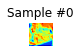

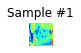

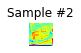

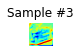

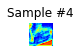

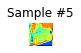

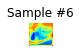

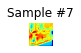

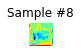

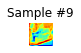

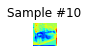

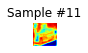

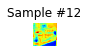

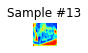

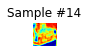

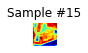

In [13]:
from torchvision.models.feature_extraction import create_feature_extractor, get_graph_node_names

images, labels = iter(trainloader).next()
image_example = torchvision.utils.make_grid(images[0])
image_example = image_example.unsqueeze(0)  # if torch tensor

# exact_list={f'model_b.{k}': str(v) for v, k in enumerate([1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])}


exact_list = {'0': '0', 
        '1': '1',
        '2': '2',
        '3': '3',
        '4': '4',
        '5': '5',
        '6': '6',
        '7': '7',
        '8': '8',
        '9': '9',
        '10': '10',
        '11': '11',
        '12': '12',
        '13': '13',
        '14': '14',
        '15': '15',
        '16': '16',
        '17': '17',
        '18': '18',
        '19': '19',
        '20': '20',
        '21': '21',
        '22': '22',
        '23': '23',
        '24': '24',
        '25': '25',
        '26': '26',
        '27': '27',
        '28': '28',
        '29': '29',}

# exact_list={f'model_b{[k]}': v for v, k in enumerate([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])}
device="cpu"
model_b = model_b.to(device)

# exact_list = sorted(exact_list.items(), key=lambda x: x[1])
# exact_list = {key: str(value) for key, value in exact_list}
# exact_list

feature_extractor = create_feature_extractor(model_b,exact_list)
x=feature_extractor(image_example)
# print(len(x.layer))
# print(x)
# print('')
for i in range(16):
    ax = plt.subplot(8, 8, i + 1)
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    plt.imshow(x['0'].detach().data.numpy()[0,i,:,:],cmap='jet')
    plt.show()

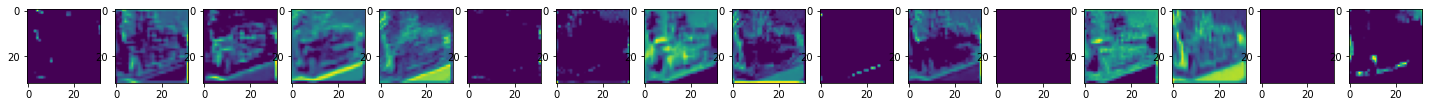

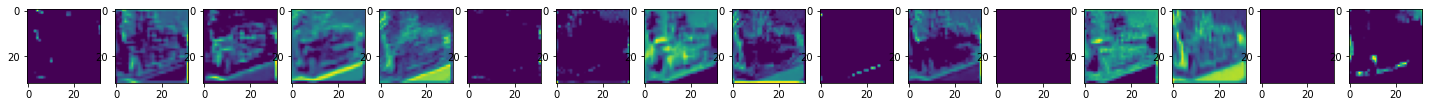

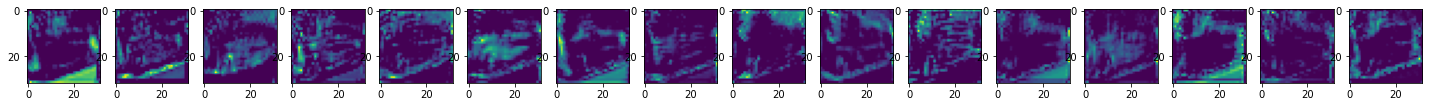

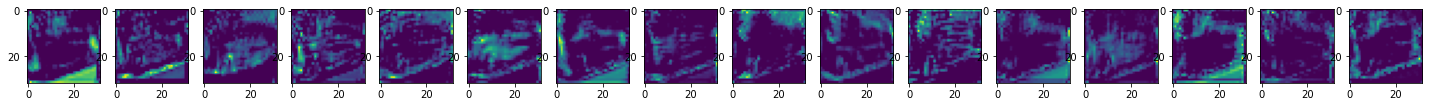

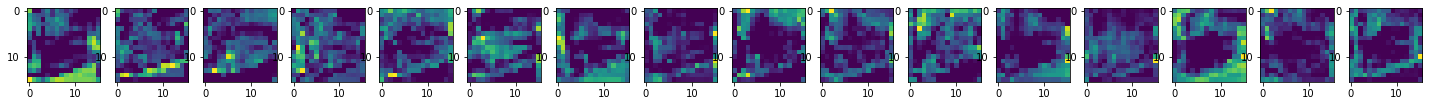

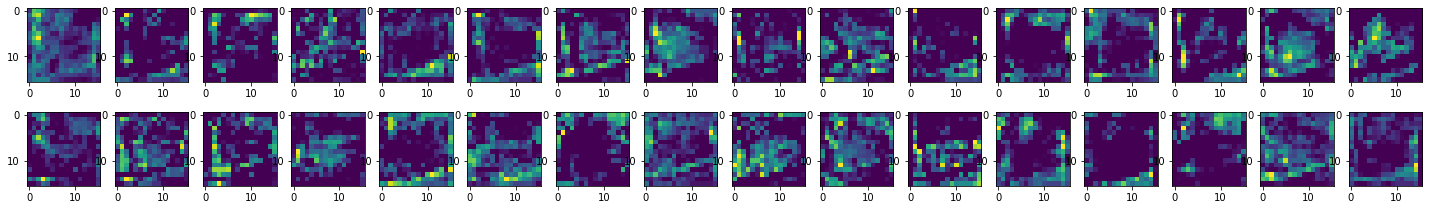

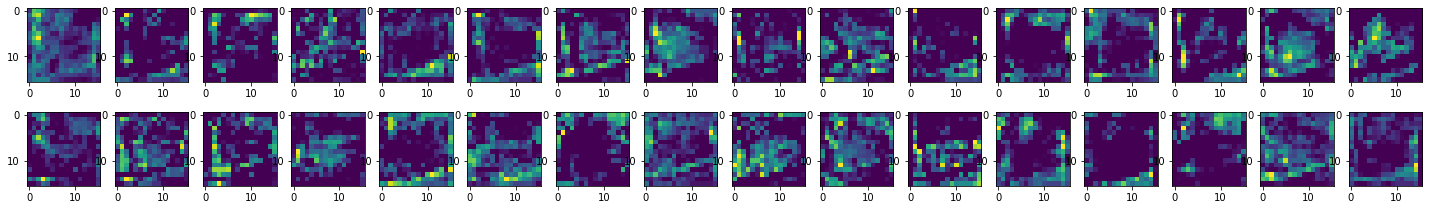

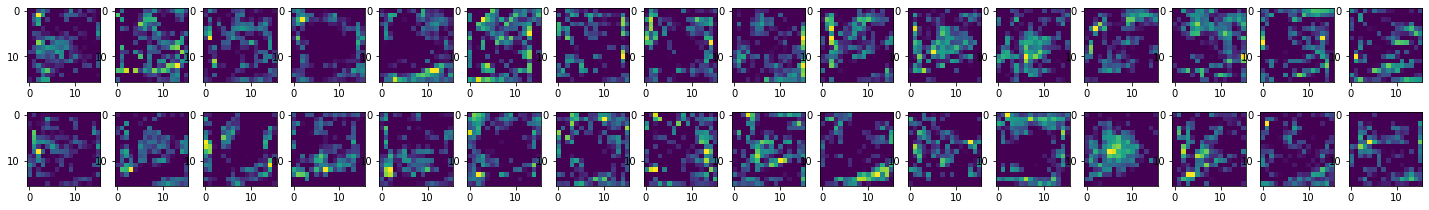

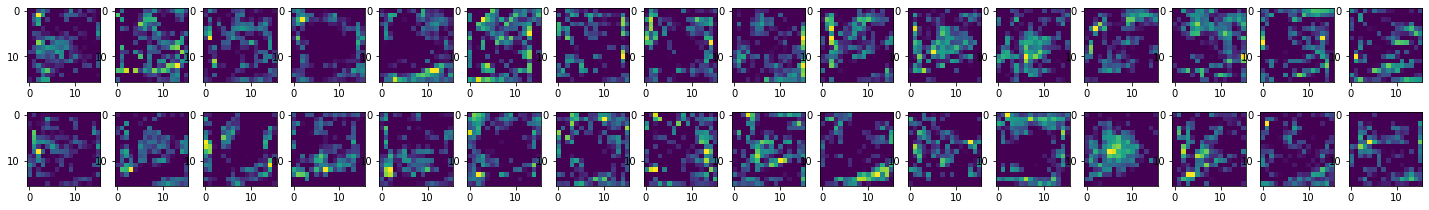

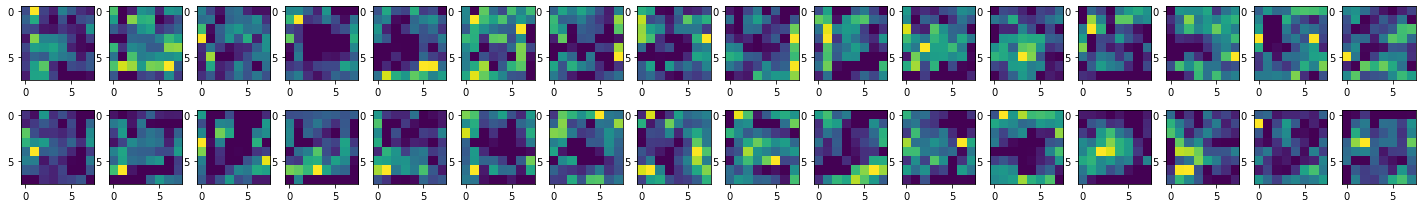

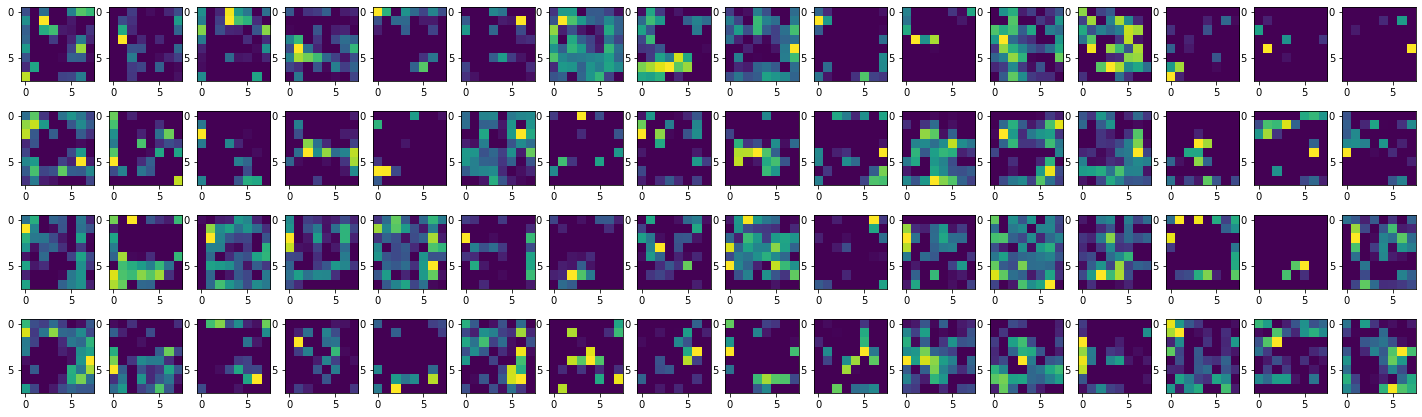

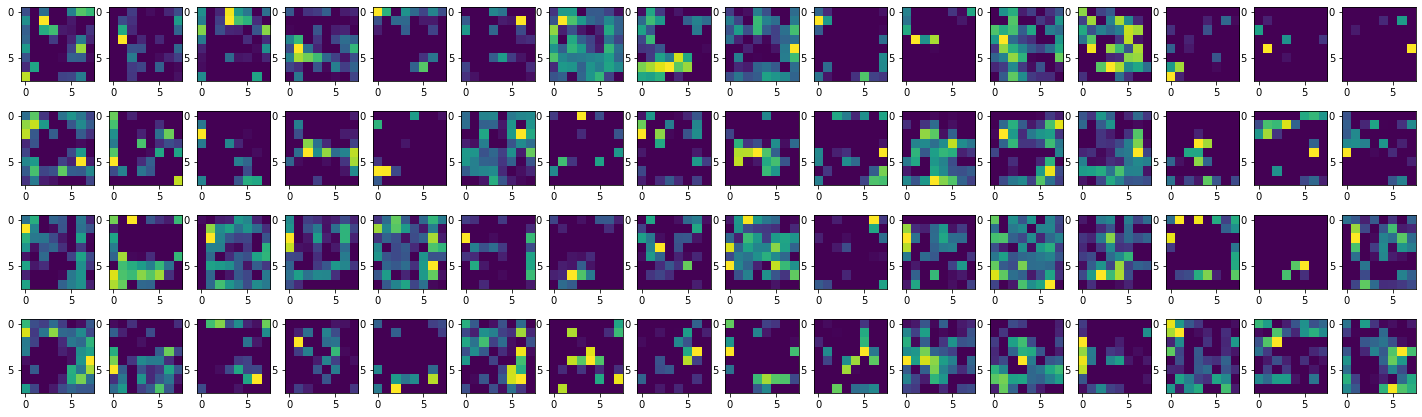

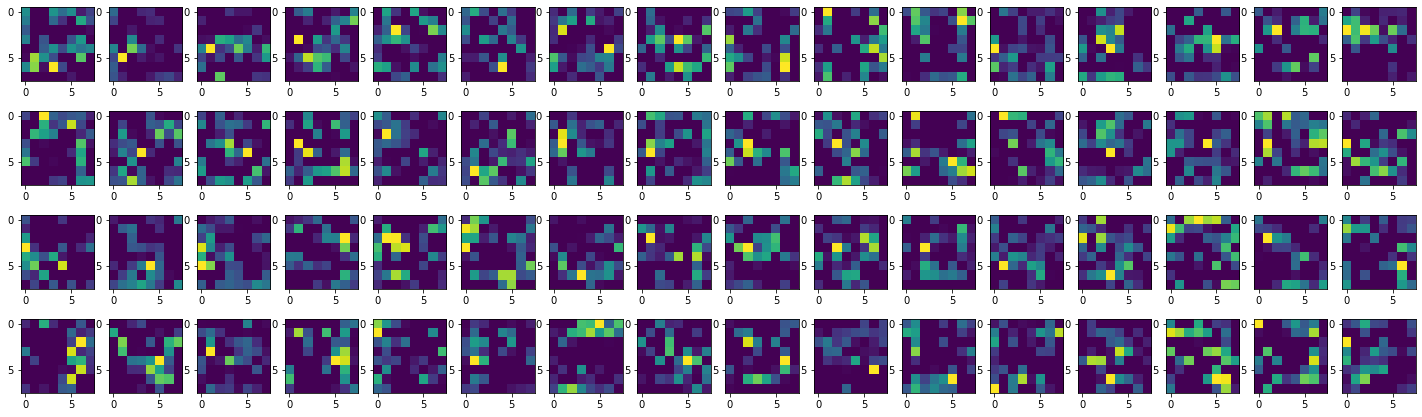

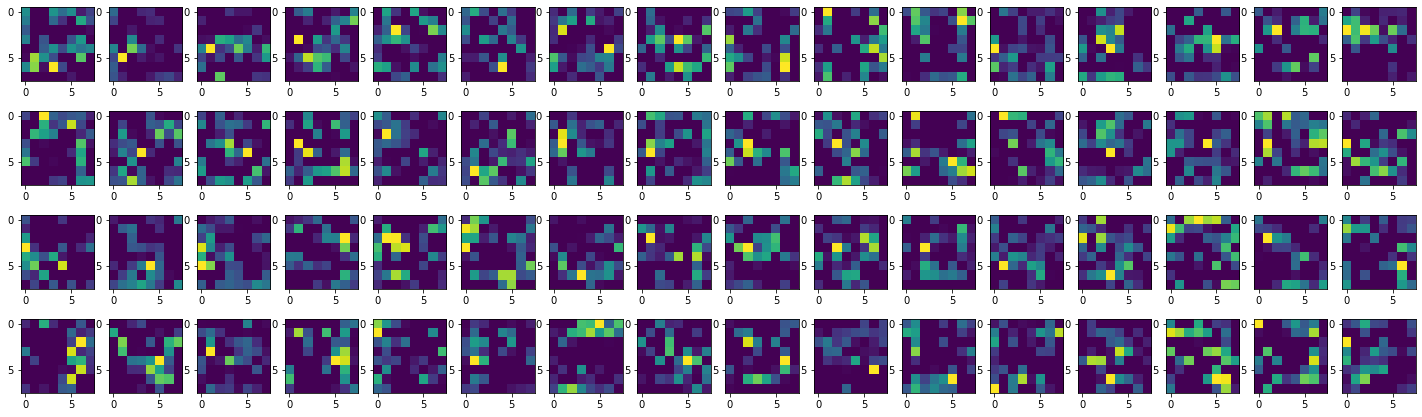

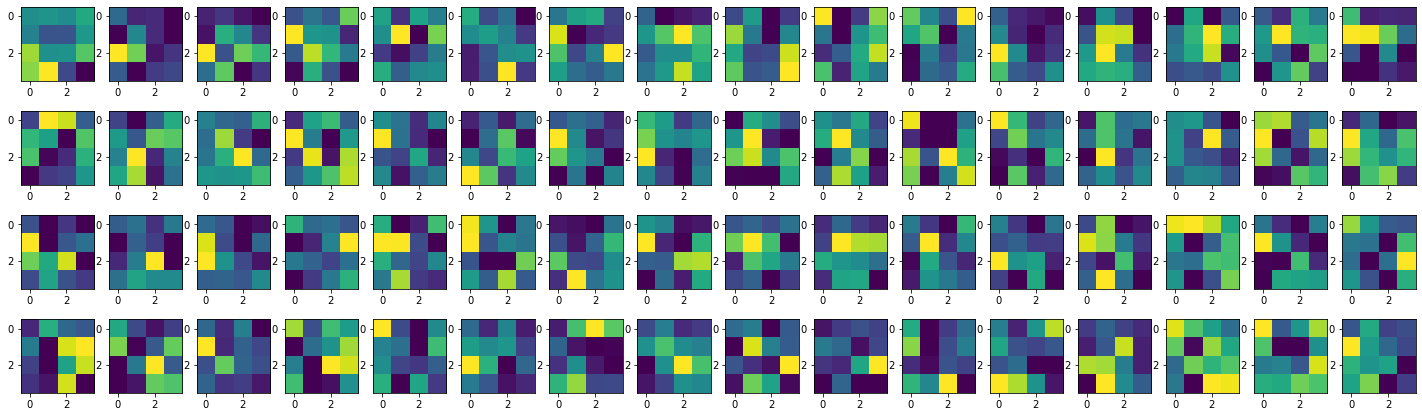

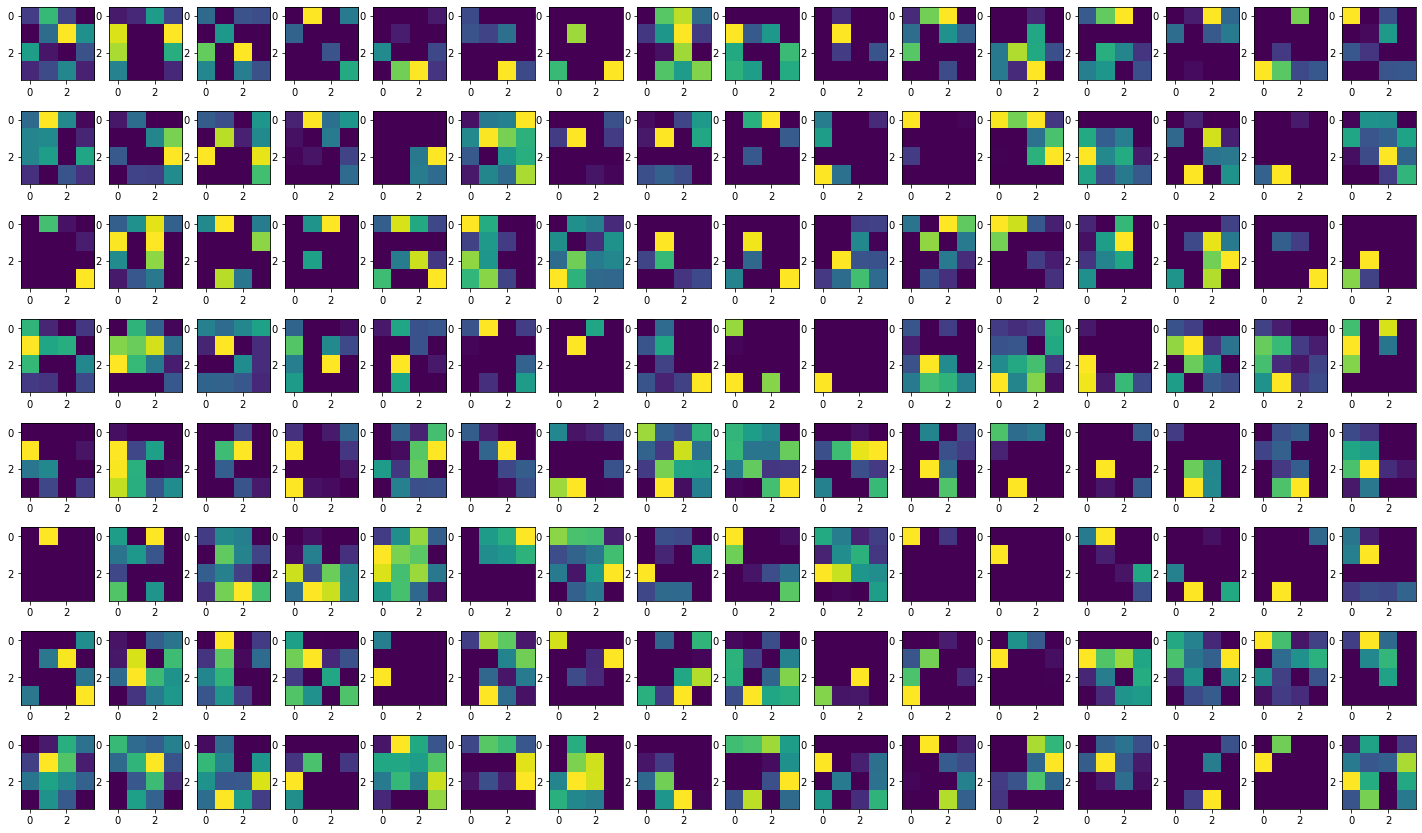

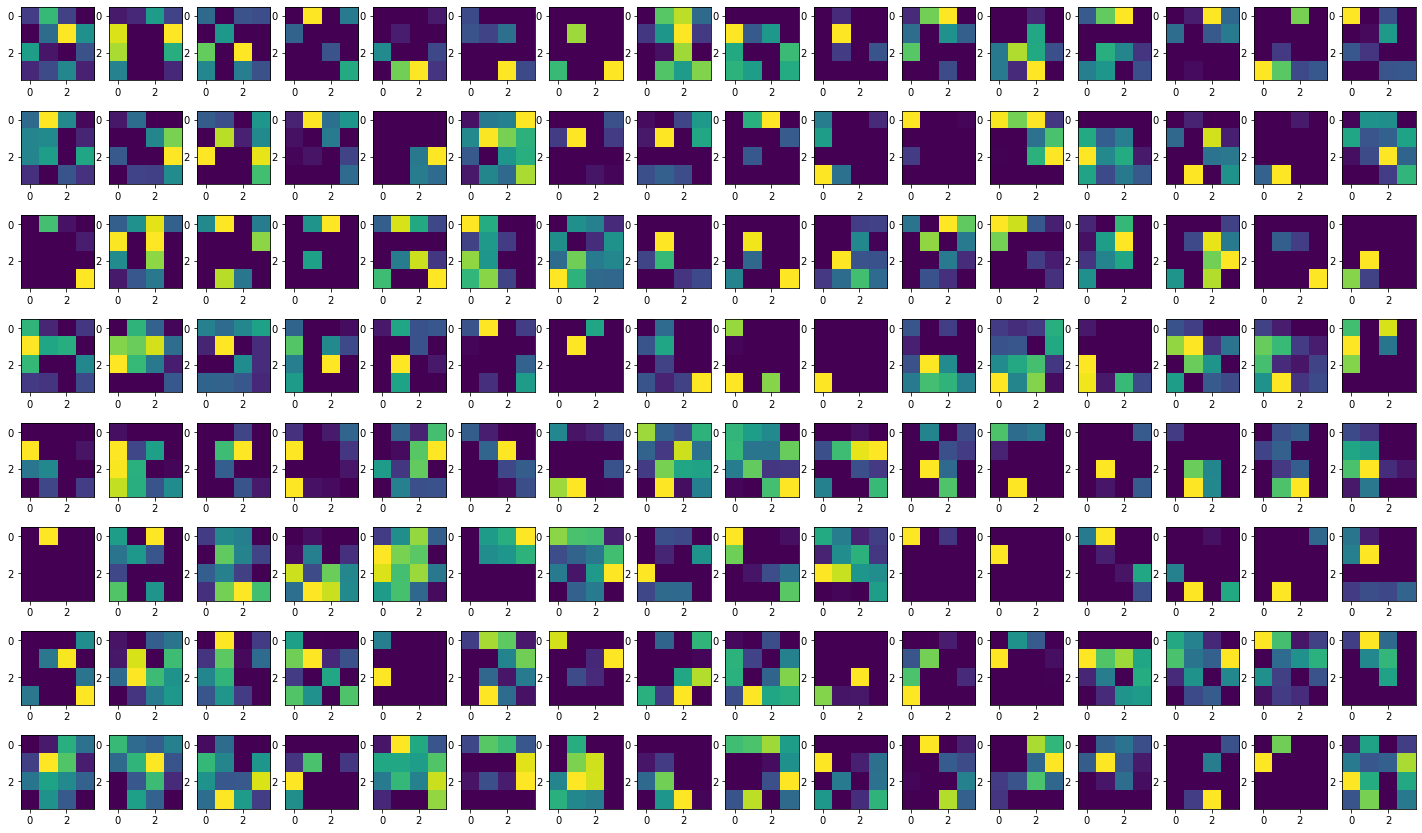

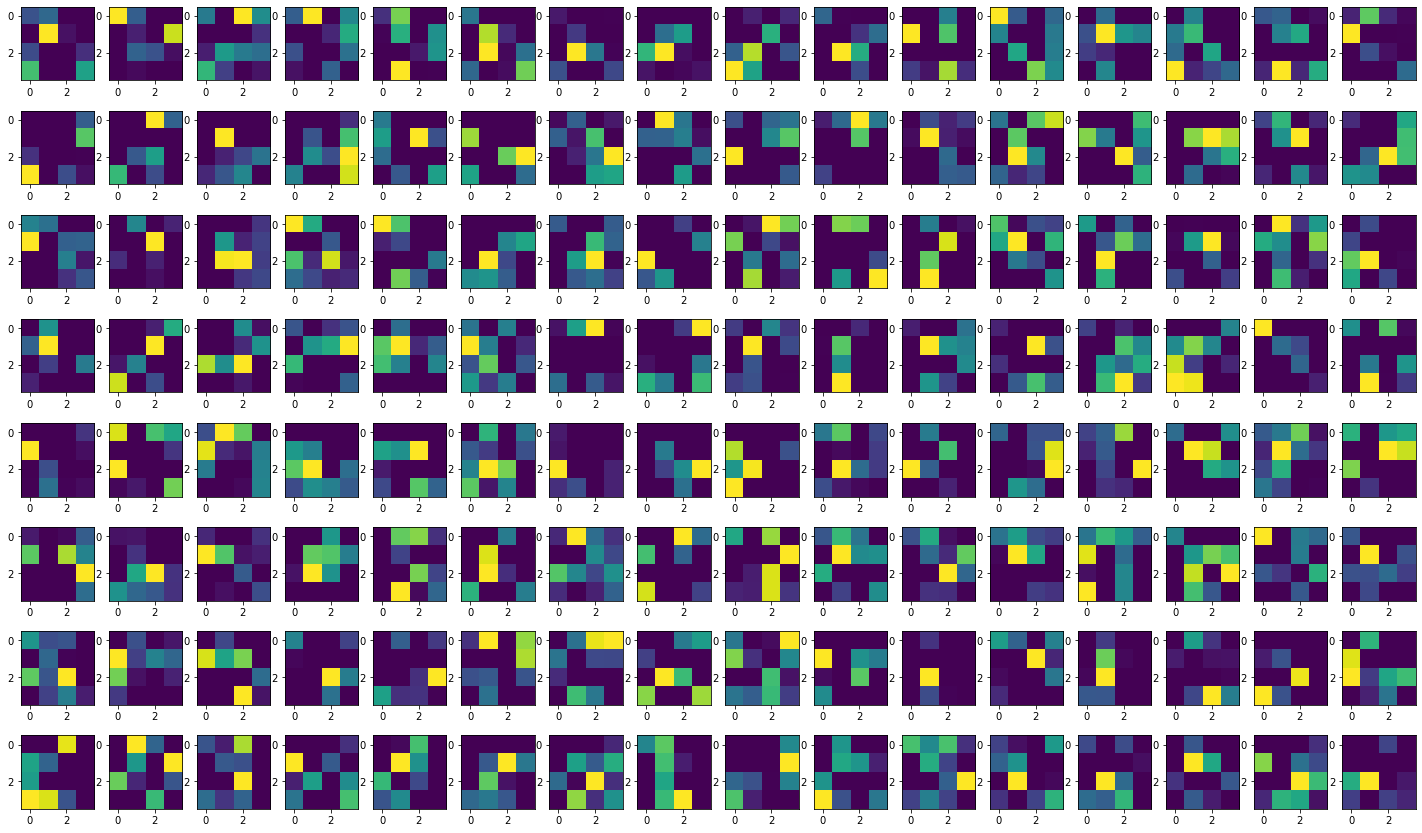

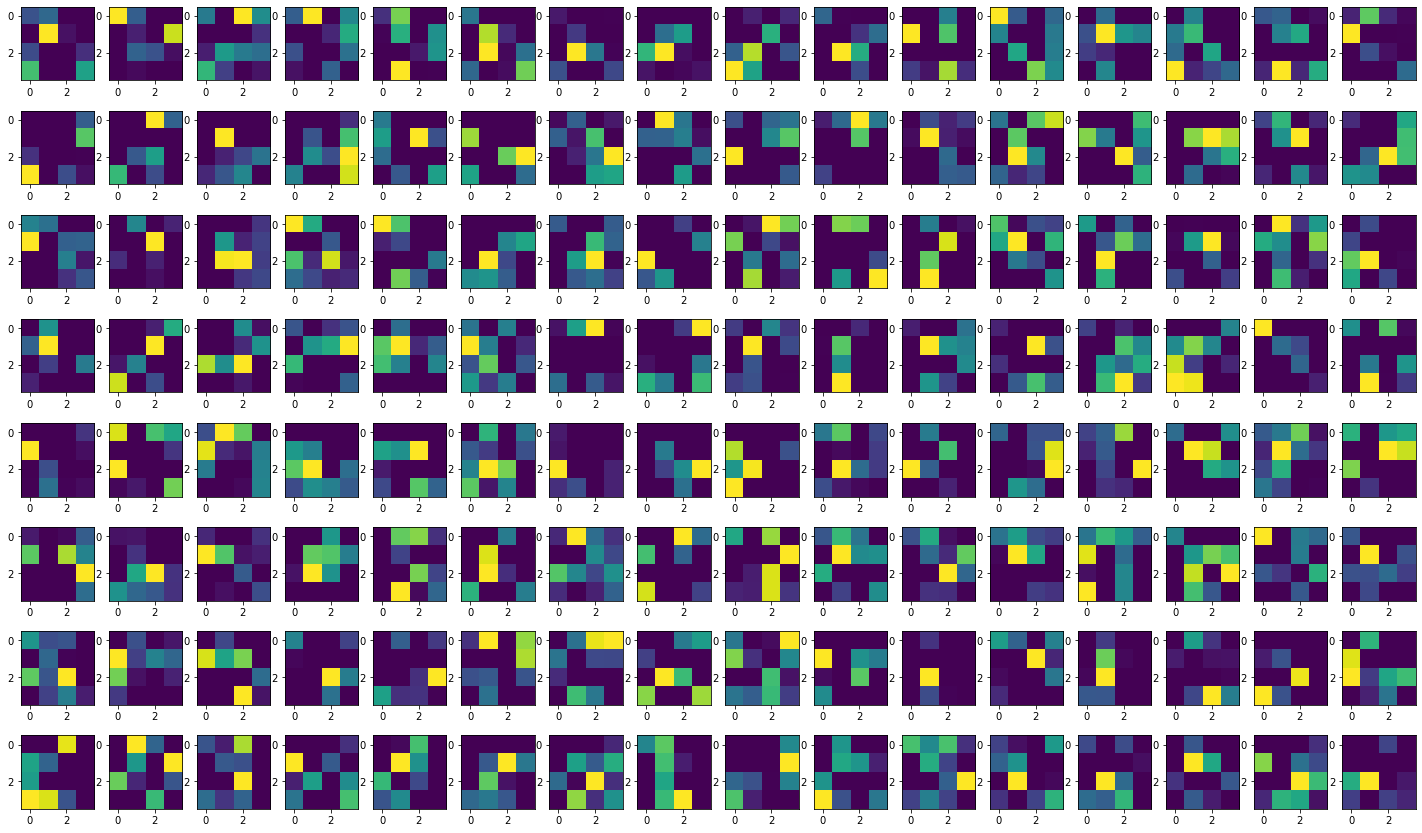

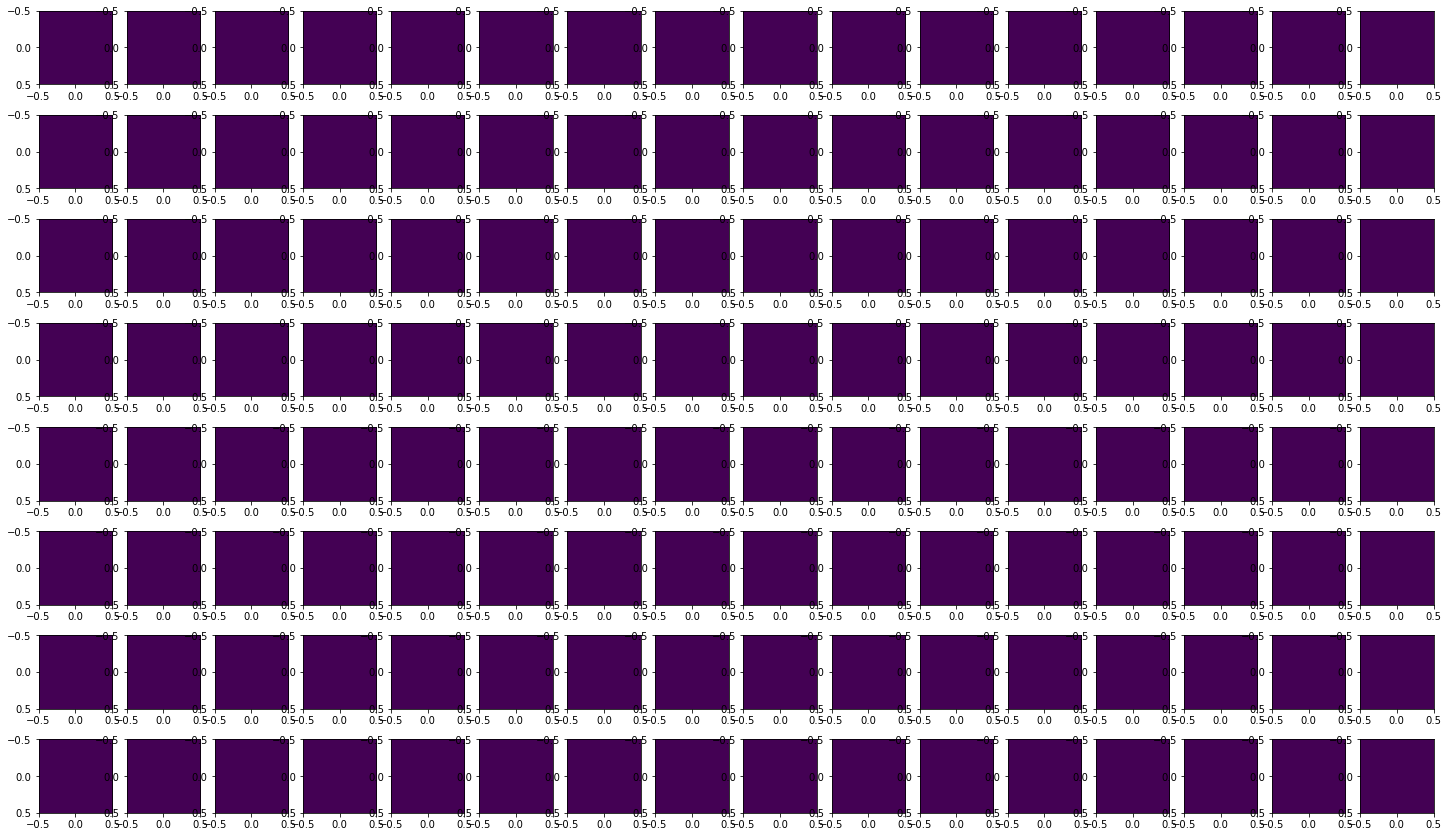

In [14]:
useful_layers = [1,2,4,5,6,8,9,11,12,13,15,16,18,19,20,22,23,25,26,27]
useful_layers = [str(x) for x in useful_layers]

# layer1=x['0'].detach().numpy()
# plt.figure(figsize=(15,5))
# # print(len(layer1[0]))
# for i,item in enumerate(layer1[0]):
# ## for j in range(16):
#     plt.subplot(1, len(layer1[0]), i + 1)
#     plt.imshow(layer1[0,i,:,:])
#     #plt.show()

for k in useful_layers:
  layer1=x[k].detach().numpy()
  plt.figure(figsize=(25,15))
  # print(layer_name[0])
  for i,item in enumerate(layer1[0]):
    plt.subplot(8, 16, i + 1)
    plt.imshow(layer1[0,i,:,:])
    #plt.show()
  #plt.title(k*20)

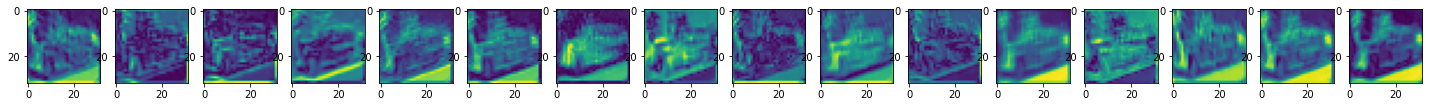

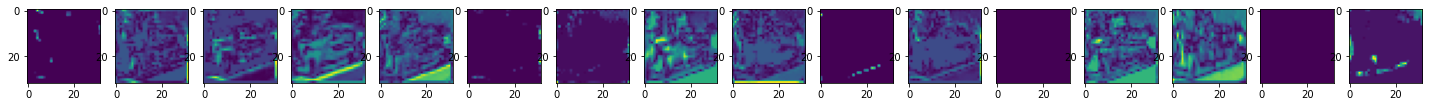

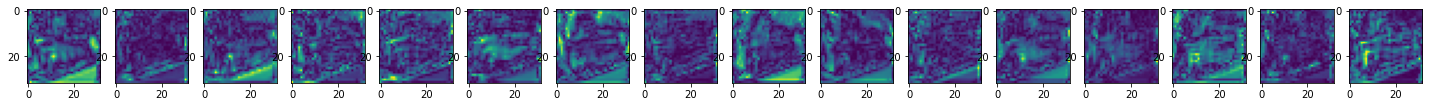

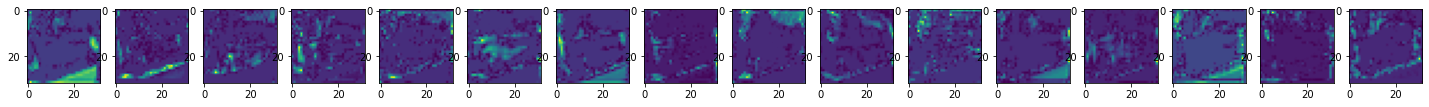

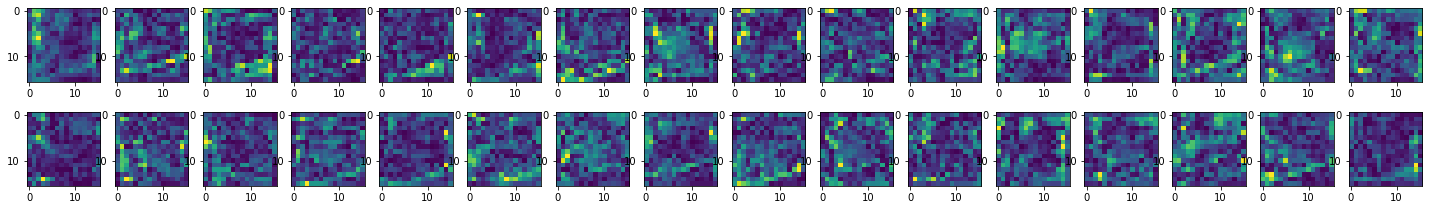

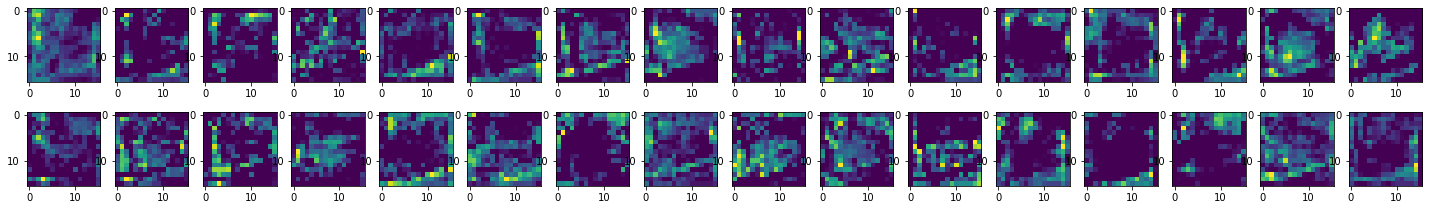

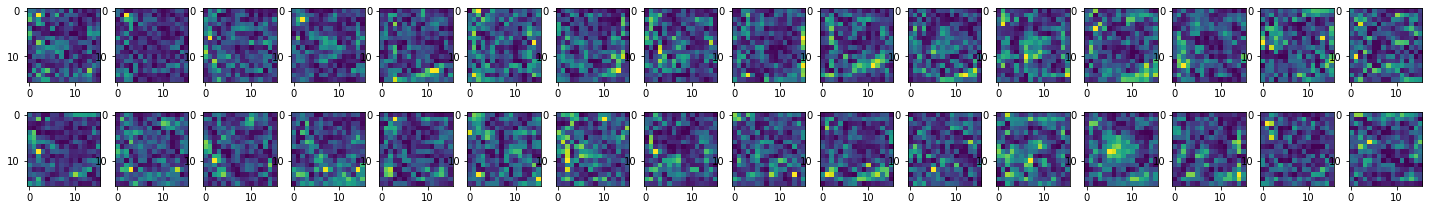

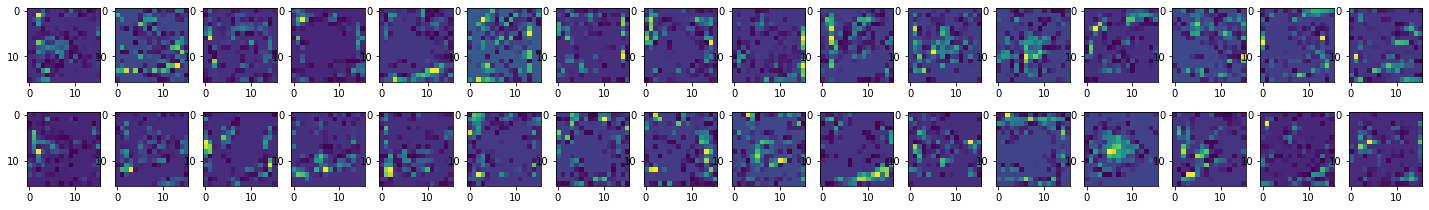

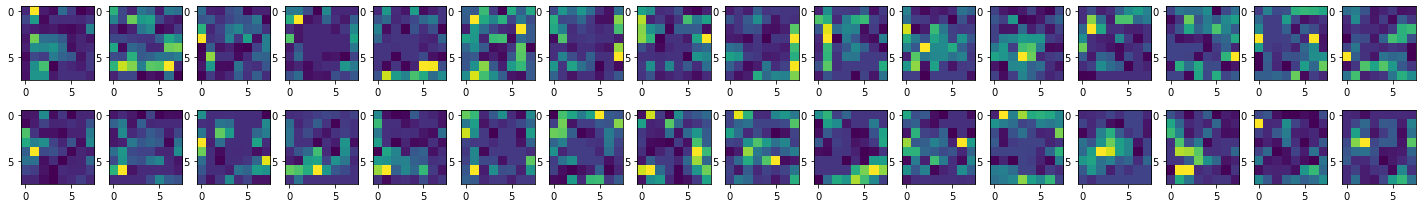

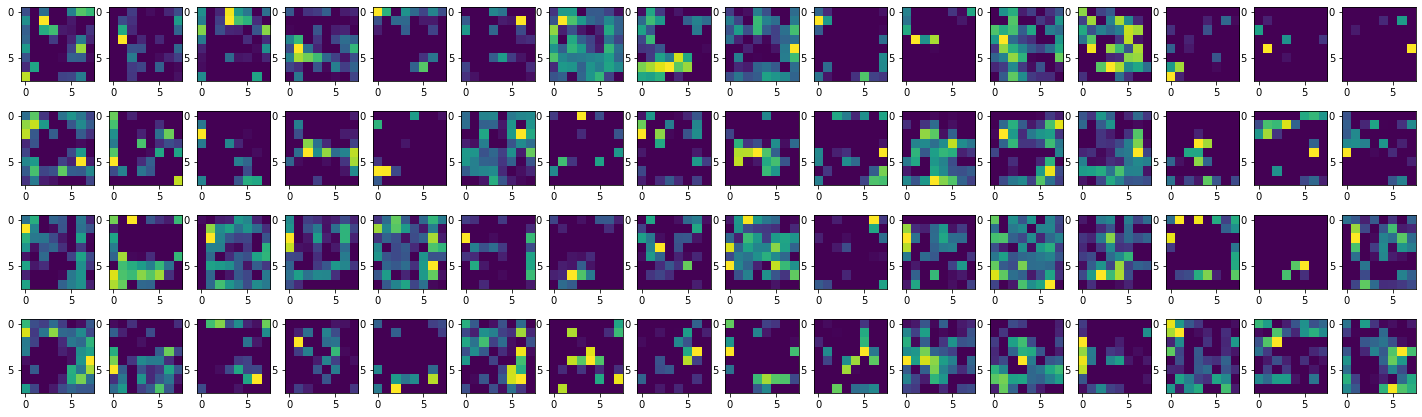

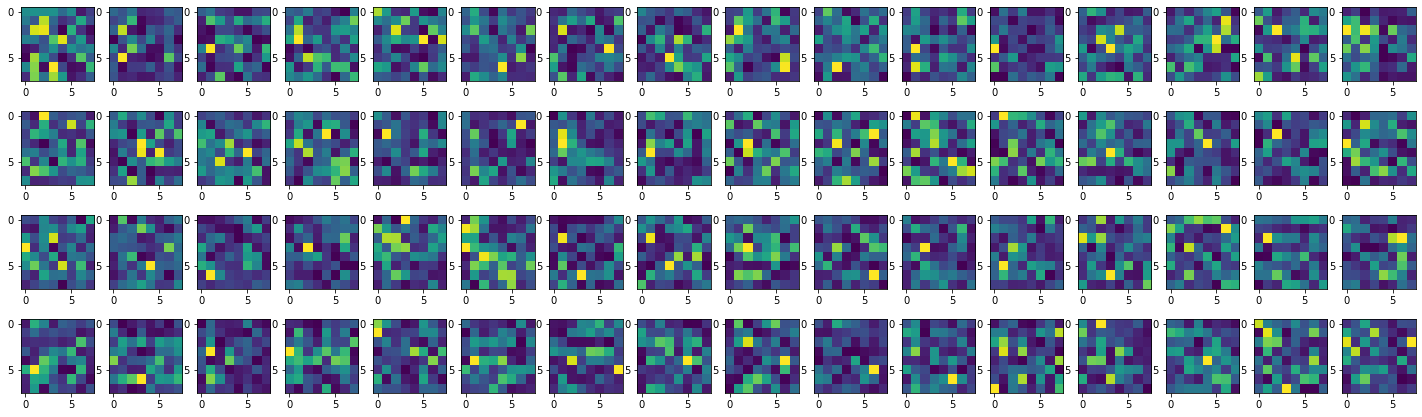

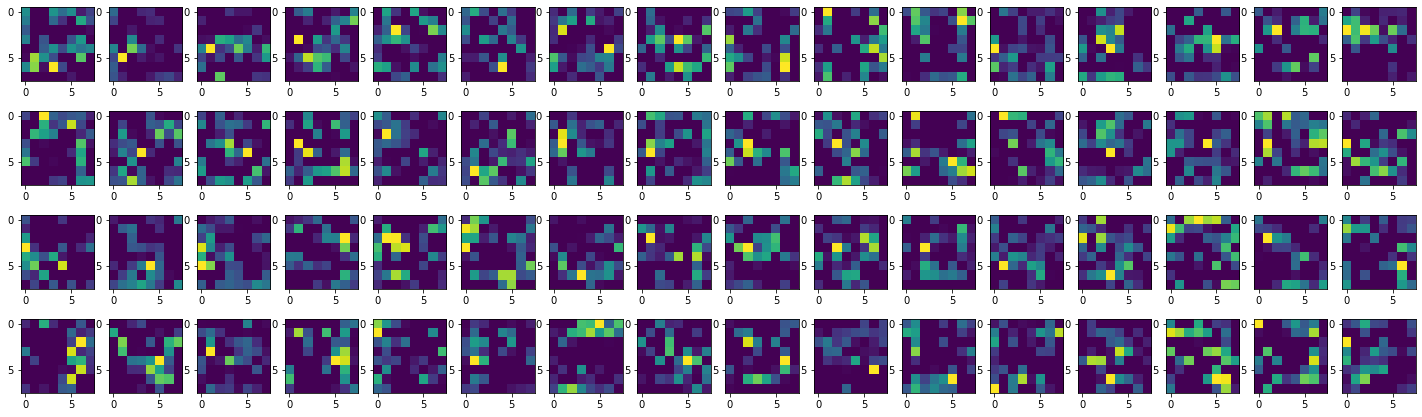

In [15]:
useful_layers = [0,2,3,5,7,8,10,12,13,15,17,18]
useful_layers = [str(x) for x in useful_layers]


for k in useful_layers:
  layer1=x[k].detach().numpy()
  layer_mean = np.expand_dims(np.abs(np.mean(layer1, axis = 0)), axis = 0)
  
  plt.figure(figsize=(25,15))
  # print(layer_name[0])
  for i,item in enumerate(layer_mean[0]):
    plt.subplot(8, 16, i + 1)
    plt.imshow(layer_mean[0,i,:,:])
  
  # plt.title(k*20)

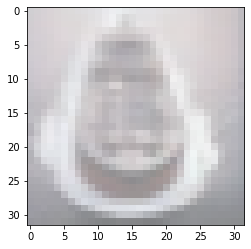

 ship


In [16]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[0]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(1)))